In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import utils as u
import importlib
importlib.reload(u)
import pandas as pd
from collections import Counter
from IPython.display import display, Markdown, Latex
import os
import glob

In [3]:
path_tw = "../fink_fat_experiments/time_window_experiments"

def gen_path(exp):
    """
    exp must be 'all' or 'mops'
    """
    assert exp == 'all' or exp == 'mops'
    if exp == 'mops':
        return "{}/confirmed_{}_fink_fat/mpc/".format(exp, exp)
    elif exp == 'all':
        return "{}_assoc/confirmed_{}_fink_fat/mpc/".format(exp, exp)

def get_tw_exp(tw_exp, kind_exp):
    assert tw_exp == "15_2_2" or tw_exp == "15_2_15" or tw_exp == "15_15_2" or tw_exp == "15_15_15"
    exp_dir = gen_path(kind_exp)
    reconstructed_orbit = pd.read_parquet(os.path.join(path_tw, tw_exp, exp_dir, "orbital.parquet"))
    reconstructed_trajectory = pd.read_parquet(os.path.join(path_tw, tw_exp, exp_dir, "trajectory_orb.parquet"))
    input_data = pd.read_parquet(os.path.join(path_tw, tw_exp, exp_dir, "save"))
    return reconstructed_orbit, reconstructed_trajectory, input_data

def get_stats(tw_exp, kind_exp):
    assert tw_exp == "15_2_2" or tw_exp == "15_2_15" or tw_exp == "15_15_2" or tw_exp == "15_15_15"
    exp_dir = gen_path(kind_exp)
    stats = pd.read_json(os.path.join(path_tw, tw_exp, exp_dir, "stats.json"))
    return stats

In [22]:
# Warning : metric_res is a global variable, run the following cells only once
metrics_res = {}
metrics_res["all"] = [[], [], [], []]
metrics_res["mops"] = [[], [], [], []]

# Reconstruction performance analysis

##### Common parameters

Associations
* intra_night_separation=120 arcsecond
* intra_night_magdiff_limit_same_fid=0.2
* intra_night_magdiff_limit_diff_fid=0.8
* inter_night_separation=0.3 degree/day
* inter_night_magdiff_limit_same_fid=0.1
* inter_night_magdiff_limit_diff_fid=0.5
* maximum_angle=1 degree/day

Orbit fitting
* n_triplets=30
* noise_ntrials=20
* prop_epoch=None
* orbfit_verbose=3

##### Definition
* Purity : Percentage of trajectory where all the observations belong the same object
* Efficiency : Number of trajectory reconstructed from the initial dataset (in percentage)

## 15_2_2

#### All associations

In [23]:
reconstructed_orbit, reconstructed_trajectory, input_data = get_tw_exp("15_2_2", "all")
print("Input data : {}".format(len(input_data)))
res = u.results(reconstructed_orbit, reconstructed_trajectory, input_data)
for i in range(0, 4):
    metrics_res["all"][i].append(res[i+1])
Markdown(res[0])

Input data : 796486



|                     | Fink_FAT |                 |
|---------------------|----------|-----------------|
|                     | All      | Only with error |
| Confirmed SSO input | 87076       | X               |
| Detectable          | 43919       | X               |
| Reconstructed orbit | 39628    | 13252           |
| - Pure              | 28719    | 12853           |
| - Unique            | 19956    | 10755           |
| Purity              | 72.5 %   | 97.0 %          |
| Efficiency          | 45.4 %   | 24.5 %          |
        

#### Mops

In [24]:
reconstructed_orbit, reconstructed_trajectory, input_data = get_tw_exp("15_2_2", "mops")
print("Input data : {}".format(len(input_data)))
res = u.results(reconstructed_orbit, reconstructed_trajectory, input_data)
for i in range(0, 4):
    metrics_res["mops"][i].append(res[i+1])
Markdown(res[0])

Input data : 796486



|                     | Fink_FAT |                 |
|---------------------|----------|-----------------|
|                     | All      | Only with error |
| Confirmed SSO input | 87076       | X               |
| Detectable          | 43919       | X               |
| Reconstructed orbit | 26162    | 6065           |
| - Pure              | 17152    | 5598           |
| - Unique            | 13388    | 5200           |
| Purity              | 65.6 %   | 92.3 %          |
| Efficiency          | 30.5 %   | 11.8 %          |
        

## 15_2_15

#### All associations

In [25]:
reconstructed_orbit, reconstructed_trajectory, input_data = get_tw_exp("15_2_15", "all")
print("Input data : {}".format(len(input_data)))
res = u.results(reconstructed_orbit, reconstructed_trajectory, input_data)
for i in range(0, 4):
    metrics_res["all"][i].append(res[i+1])
Markdown(res[0])

Input data : 796486



|                     | Fink_FAT |                 |
|---------------------|----------|-----------------|
|                     | All      | Only with error |
| Confirmed SSO input | 87076       | X               |
| Detectable          | 43919       | X               |
| Reconstructed orbit | 32460    | 11246           |
| - Pure              | 22226    | 10787           |
| - Unique            | 16568    | 9131           |
| Purity              | 68.5 %   | 95.9 %          |
| Efficiency          | 37.7 %   | 20.8 %          |
        

#### Mops

In [26]:
reconstructed_orbit, reconstructed_trajectory, input_data = get_tw_exp("15_2_15", "mops")
print("Input data : {}".format(len(input_data)))
res = u.results(reconstructed_orbit, reconstructed_trajectory, input_data)
for i in range(0, 4):
    metrics_res["mops"][i].append(res[i+1])
Markdown(res[0])

Input data : 796486



|                     | Fink_FAT |                 |
|---------------------|----------|-----------------|
|                     | All      | Only with error |
| Confirmed SSO input | 87076       | X               |
| Detectable          | 43919       | X               |
| Reconstructed orbit | 29192    | 7680           |
| - Pure              | 17354    | 6957           |
| - Unique            | 13963    | 6457           |
| Purity              | 59.4 %   | 90.6 %          |
| Efficiency          | 31.8 %   | 14.7 %          |
        

## 15_15_2

#### All associations

In [27]:
reconstructed_orbit, reconstructed_trajectory, input_data = get_tw_exp("15_15_2", "all")
print("Input data : {}".format(len(input_data)))
res = u.results(reconstructed_orbit, reconstructed_trajectory, input_data)
for i in range(0, 4):
    metrics_res["all"][i].append(res[i+1])
Markdown(res[0])

Input data : 796486



|                     | Fink_FAT |                 |
|---------------------|----------|-----------------|
|                     | All      | Only with error |
| Confirmed SSO input | 87076       | X               |
| Detectable          | 43919       | X               |
| Reconstructed orbit | 35138    | 11379           |
| - Pure              | 24724    | 10968           |
| - Unique            | 17921    | 9346           |
| Purity              | 70.4 %   | 96.4 %          |
| Efficiency          | 40.8 %   | 21.3 %          |
        

#### Mops

In [28]:
reconstructed_orbit, reconstructed_trajectory, input_data = get_tw_exp("15_15_2", "mops")
print("Input data : {}".format(len(input_data)))
res = u.results(reconstructed_orbit, reconstructed_trajectory, input_data)
for i in range(0, 4):
    metrics_res["mops"][i].append(res[i+1])
Markdown(res[0])

Input data : 796486



|                     | Fink_FAT |                 |
|---------------------|----------|-----------------|
|                     | All      | Only with error |
| Confirmed SSO input | 87076       | X               |
| Detectable          | 43919       | X               |
| Reconstructed orbit | 26157    | 6063           |
| - Pure              | 17148    | 5596           |
| - Unique            | 13386    | 5199           |
| Purity              | 65.6 %   | 92.3 %          |
| Efficiency          | 30.5 %   | 11.8 %          |
        

## 15_15_15

#### All associations

In [29]:
reconstructed_orbit, reconstructed_trajectory, input_data = get_tw_exp("15_15_15", "all")
print("Input data : {}".format(len(input_data)))
res = u.results(reconstructed_orbit, reconstructed_trajectory, input_data)
for i in range(0, 4):
    metrics_res["all"][i].append(res[i+1])
Markdown(res[0])

Input data : 796486



|                     | Fink_FAT |                 |
|---------------------|----------|-----------------|
|                     | All      | Only with error |
| Confirmed SSO input | 87076       | X               |
| Detectable          | 43919       | X               |
| Reconstructed orbit | 21960    | 6738           |
| - Pure              | 13714    | 6341           |
| - Unique            | 10697    | 5475           |
| Purity              | 62.4 %   | 94.1 %          |
| Efficiency          | 24.4 %   | 12.5 %          |
        

#### Mops

In [30]:
reconstructed_orbit, reconstructed_trajectory, input_data = get_tw_exp("15_15_15", "mops")
print("Input data : {}".format(len(input_data)))
res = u.results(reconstructed_orbit, reconstructed_trajectory, input_data)
for i in range(0, 4):
    metrics_res["mops"][i].append(res[i+1])
Markdown(res[0])

Input data : 796486



|                     | Fink_FAT |                 |
|---------------------|----------|-----------------|
|                     | All      | Only with error |
| Confirmed SSO input | 87076       | X               |
| Detectable          | 43919       | X               |
| Reconstructed orbit | 29196    | 7682           |
| - Pure              | 17356    | 6959           |
| - Unique            | 13964    | 6459           |
| Purity              | 59.4 %   | 90.6 %          |
| Efficiency          | 31.8 %   | 14.7 %          |
        

#### Summary

In [31]:
import matplotlib.pyplot as plt
import numpy as np

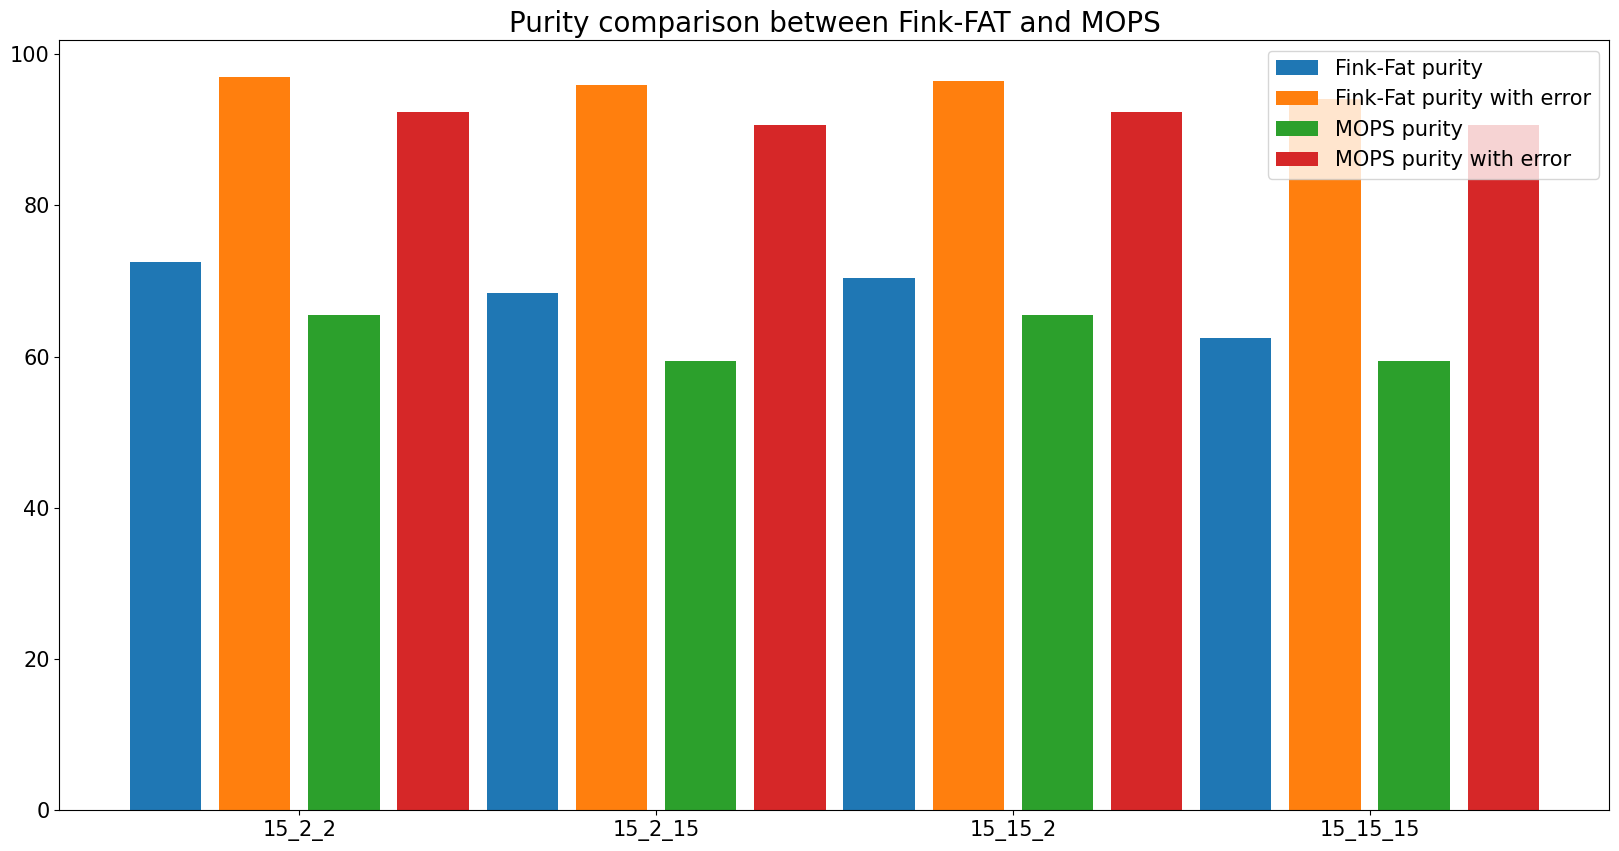

In [32]:
_ = plt.figure(figsize=(20, 10))
plt.title("Purity comparison between Fink-FAT and MOPS", fontdict={"size": 20})
plt.bar(np.arange(0, 4*4, 4), height=metrics_res["all"][0], label="Fink-Fat purity")
plt.bar(np.arange(1, 4*4, 4), height=metrics_res["all"][1], label="Fink-Fat purity with error")
plt.bar(np.arange(2, 4*4, 4), height=metrics_res["mops"][0], label="MOPS purity")
plt.bar(np.arange(3, 4*4, 4), height=metrics_res["mops"][1], label="MOPS purity with error")

plt.xticks([1.5, 5.5, 9.5, 13.5], ['15_2_2', '15_2_15', '15_15_2', '15_15_15'])
ax = plt.gca()
ax.tick_params(axis="x", which="major", labelsize=15)
ax.tick_params(axis="y", which="major", labelsize=15)
plt.legend(prop={"size": 15})
plt.show()

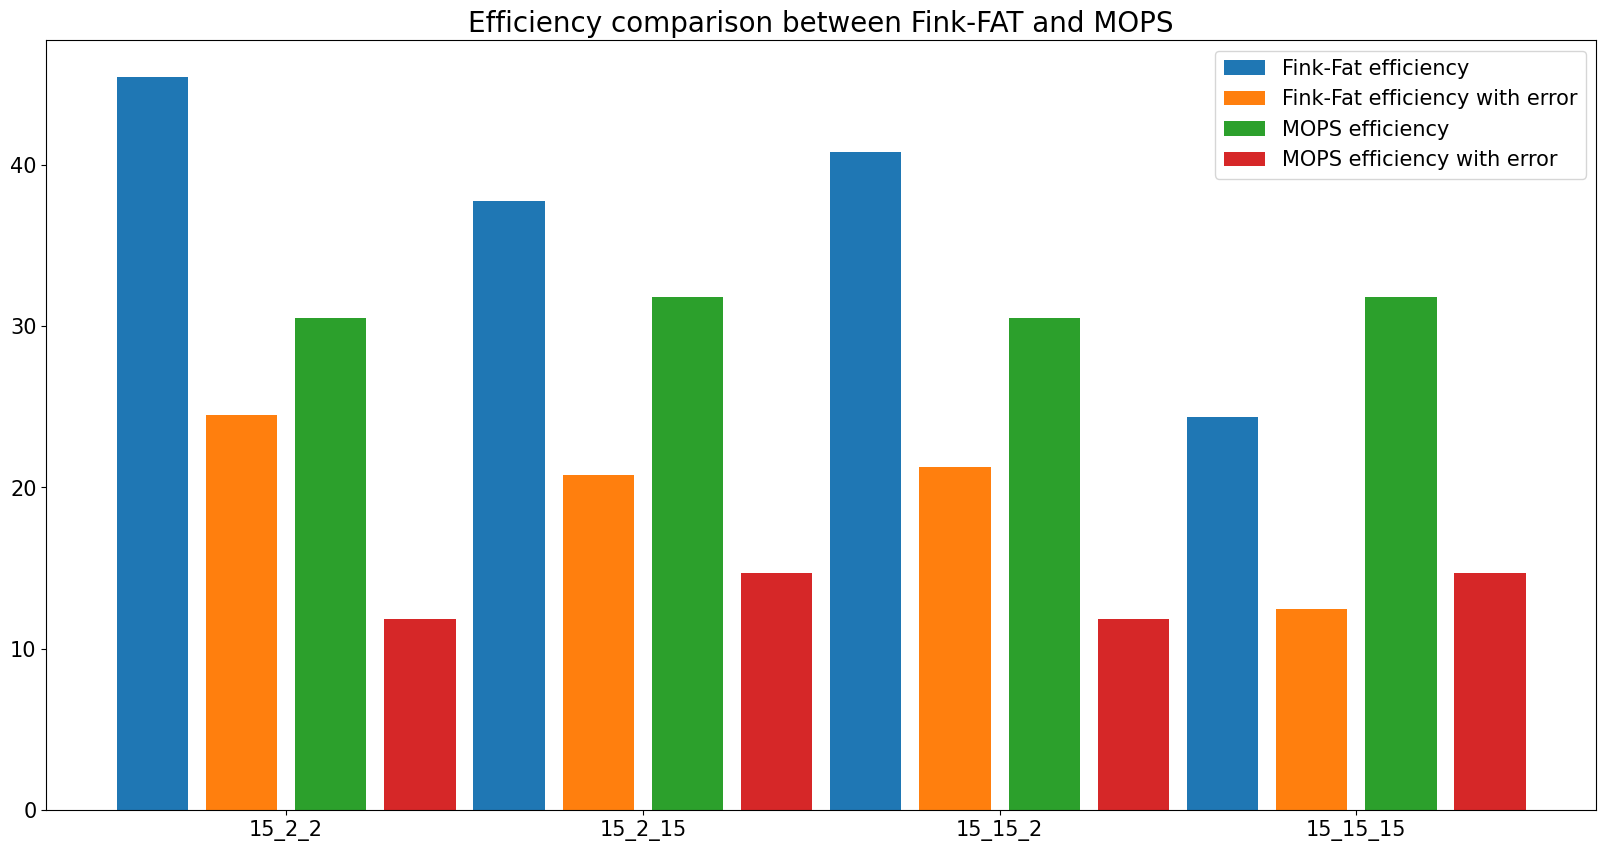

In [33]:
_ = plt.figure(figsize=(20, 10))
plt.title("Efficiency comparison between Fink-FAT and MOPS", fontdict={"size": 20})
plt.bar(np.arange(0, 4*4, 4), height=metrics_res["all"][2], label="Fink-Fat efficiency")
plt.bar(np.arange(1, 4*4, 4), height=metrics_res["all"][3], label="Fink-Fat efficiency with error")
plt.bar(np.arange(2, 4*4, 4), height=metrics_res["mops"][2], label="MOPS efficiency")
plt.bar(np.arange(3, 4*4, 4), height=metrics_res["mops"][3], label="MOPS efficiency with error")

plt.xticks([1.5, 5.5, 9.5, 13.5], ['15_2_2', '15_2_15', '15_15_2', '15_15_15'])
ax = plt.gca()
ax.tick_params(axis="x", which="major", labelsize=15)
ax.tick_params(axis="y", which="major", labelsize=15)
plt.legend(prop={"size": 15})
plt.show()

# Algorithm performance analysis

Machine configuration
* association
    * Single core algorithm
    * Intel Core Processor (Haswell, no TSX, IBRS)
    * CPU MHz:               2299.998
    * Memory RAM: 35.2 GB
* Orbit fitting
    * Distributed algorithm using Spark 3
    * 24 core with 4 core/executor (6 executors)
    * 8 GB of RAM/executors
    * Orbfit version: 5.0

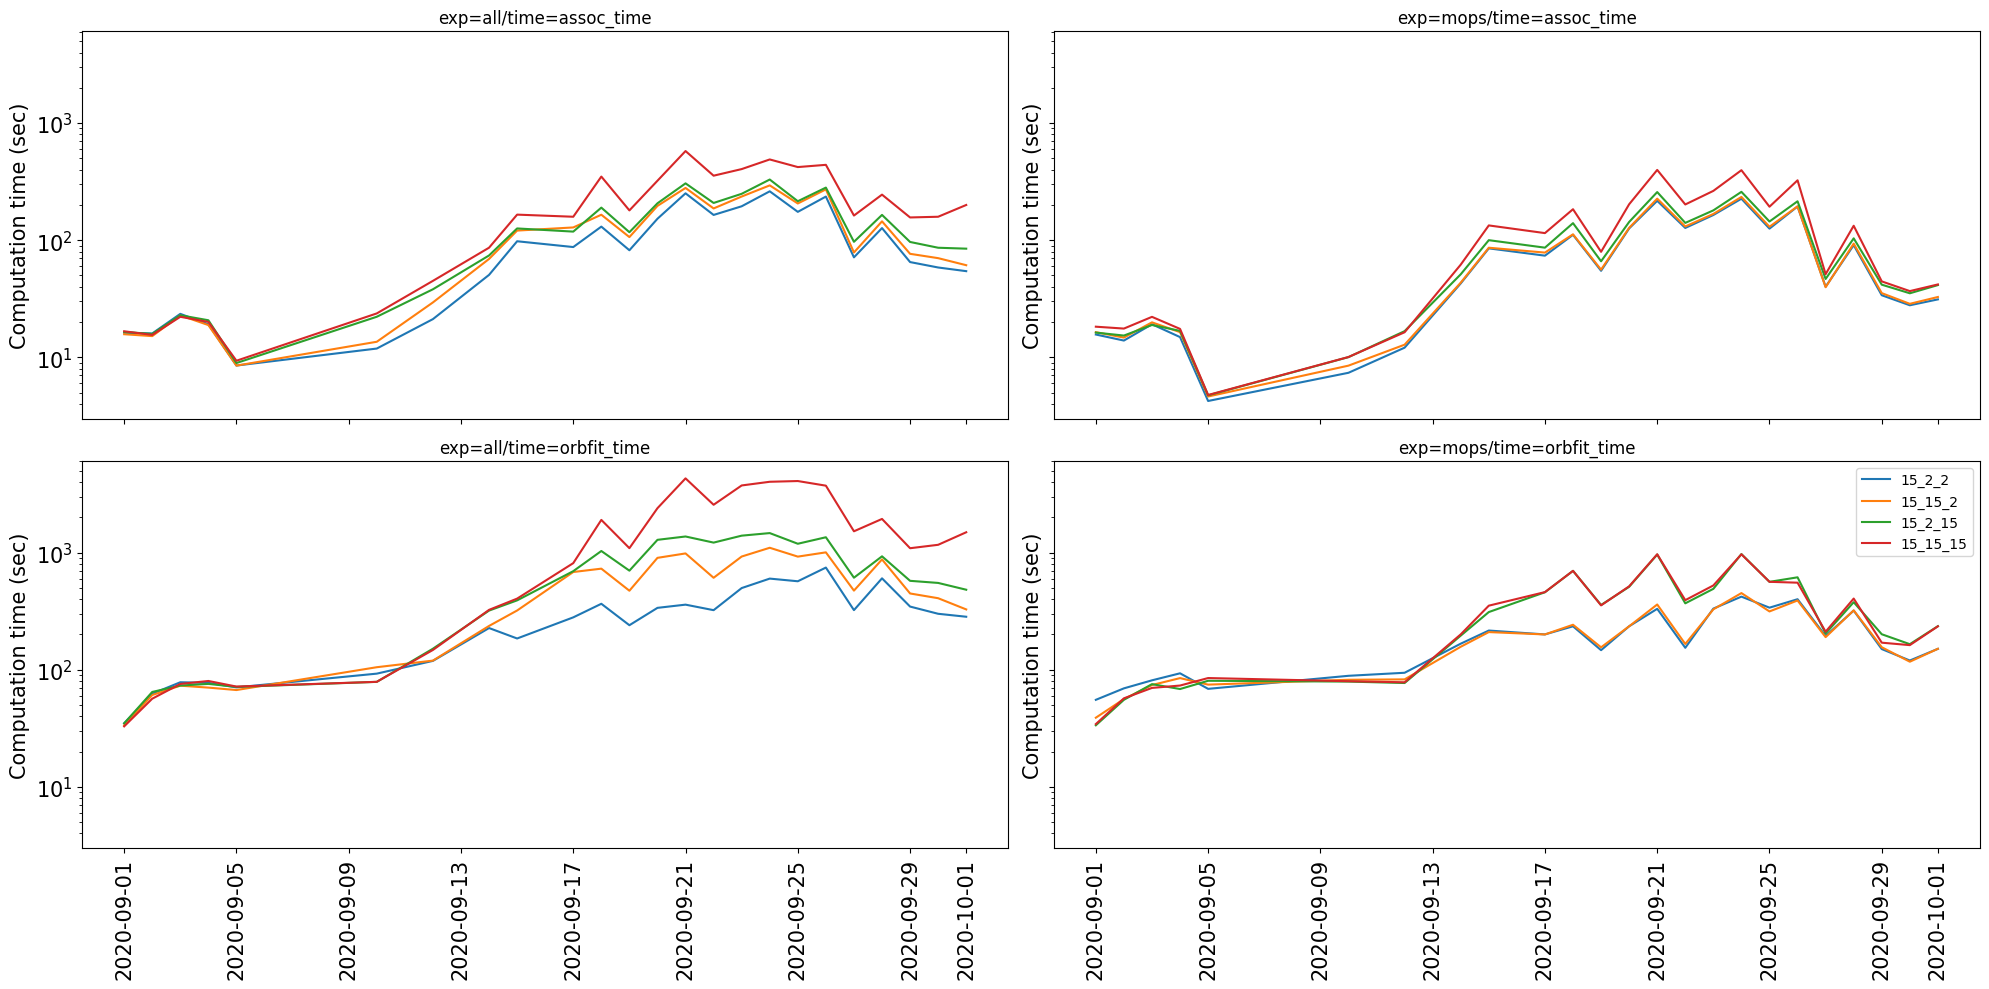

In [34]:
# _ = plt.figure(figsize=(20, 10))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10), sharey=True, sharex=True)

def time_plot(ax, kind_exp, time_col):
    ax.plot(get_stats("15_2_2", kind_exp).T[time_col], label="15_2_2")
    ax.plot(get_stats("15_15_2", kind_exp).T[time_col], label="15_15_2")
    ax.plot(get_stats("15_2_15", kind_exp).T[time_col], label="15_2_15")
    ax.plot(get_stats("15_15_15", kind_exp).T[time_col], label="15_15_15")
    ax.set_title("exp={}/time={}".format(kind_exp, time_col))
    ax.set_yscale('log')
    ax.tick_params(axis="x", which="major", labelsize=15, rotation=90)
    ax.tick_params(axis="y", which="major", labelsize=15)
    ax.set_ylabel("Computation time (sec)", fontsize=15)

time_plot(ax1, "all", "assoc_time")
time_plot(ax2, "mops", "assoc_time")
time_plot(ax3, "all", "orbfit_time")
time_plot(ax4, "mops", "orbfit_time")
plt.tight_layout()
plt.legend()
plt.show()

In [35]:
get_stats("15_15_15", "all").T

,assoc_time,nb_new_alerts,nb_old_obs,nb_orb,nb_traj,nb_traj_to_orbfit,orbfit_time
2020-09-01,16.700016,12420.0,0.0,3.0,0.0,7.0,32.808625
2020-09-02,15.540776,11239.0,5769.0,22.0,3024.0,23.0,56.516016
2020-09-03,22.197180,15988.0,9401.0,88.0,6343.0,92.0,75.543716
2020-09-04,20.075436,14503.0,10587.0,206.0,15794.0,211.0,80.075691
2020-09-05,9.357098,3314.0,10920.0,124.0,23476.0,130.0,71.729965
2020-09-10,23.719425,4938.0,10492.0,219.0,25111.0,438.0,78.750577
2020-09-12,44.984144,13938.0,9761.0,438.0,30958.0,1294.0,147.304625
2020-09-14,86.348366,23141.0,10492.0,802.0,57860.0,4130.0,324.049037
2020-09-15,165.399277,39106.0,10339.0,563.0,86256.0,5288.0,404.257977
2020-09-17,158.649987,30846.0,8478.0,718.0,181962.0,11484.0,811.953491
